In [1]:
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

# Data

In [2]:
# import data
phys = pd.read_csv('../physicians.csv')
proc = pd.read_csv('../procedures.csv')

In [3]:
# phys doesn't have null value
# There are 36025 doctors

phys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36025 entries, 0 to 36024
Data columns (total 2 columns):
id           36025 non-null int64
specialty    36025 non-null object
dtypes: int64(1), object(1)
memory usage: 563.0+ KB


In [4]:
# proc doesn't have null value
proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587774 entries, 0 to 587773
Data columns (total 4 columns):
physician_id          587774 non-null int64
procedure_code        587774 non-null object
procedure             587774 non-null object
number_of_patients    587774 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.9+ MB


In [12]:
proc.head(20)

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16
5,0,99221,"initial_hospital_inpatient_care,_typically_30_...",13
6,0,99232,"subsequent_hospital_inpatient_care,_typically_...",12
7,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14
8,2,99213,established_patient_office_or_other_outpatient...,34
9,2,99214,established_patient_office_or_other_outpatient...,17


In [5]:
# List of specialty. There are 71 distinct records, but 69 specialties, 
# Notice there are two categories marked as "Unknown" and "Unknown Physician Specialty Code"
#

print(len(phys['specialty'].unique()))
sorted(phys['specialty'].unique())

71


['Addiction Medicine',
 'Allergy/Immunology',
 'Anesthesiology',
 'Audiologist (billing independently)',
 'CRNA',
 'Cardiac Electrophysiology',
 'Cardiac Surgery',
 'Cardiology',
 'Chiropractic',
 'Clinical Laboratory',
 'Clinical Psychologist',
 'Colorectal Surgery (formerly proctology)',
 'Critical Care (Intensivists)',
 'Dermatology',
 'Diagnostic Radiology',
 'Emergency Medicine',
 'Endocrinology',
 'Family Practice',
 'Gastroenterology',
 'General Practice',
 'General Surgery',
 'Geriatric Medicine',
 'Geriatric Psychiatry',
 'Gynecological/Oncology',
 'Hand Surgery',
 'Hematology',
 'Hematology/Oncology',
 'Hospice and Palliative Care',
 'Infectious Disease',
 'Internal Medicine',
 'Interventional Pain Management',
 'Interventional Radiology',
 'Licensed Clinical Social Worker',
 'Maxillofacial Surgery',
 'Medical Oncology',
 'Multispecialty Clinic/Group Practice',
 'Nephrology',
 'Neurology',
 'Neuropsychiatry',
 'Neurosurgery',
 'Nuclear Medicine',
 'Nurse Practitioner',
 'Obst

In [6]:
# Noticed that there is a "Unknown Physician Specialty Code", which contains only 4 records and can be ignored.
phys[phys['specialty'] == 'Unknown Physician Specialty Code']

,id,specialty
1814,1814,Unknown Physician Specialty Code
4776,4776,Unknown Physician Specialty Code
8597,8597,Unknown Physician Specialty Code
17951,17951,Unknown Physician Specialty Code


In [7]:
# There are 11092 doctors with "Unknown" specialty, which is 30.79% of the total (36025).
phys[phys['specialty'] == 'Unknown']

,id,specialty
1,1,Unknown
11,11,Unknown
13,13,Unknown
16,16,Unknown
17,17,Unknown
18,18,Unknown
22,22,Unknown
32,32,Unknown
33,33,Unknown
34,34,Unknown


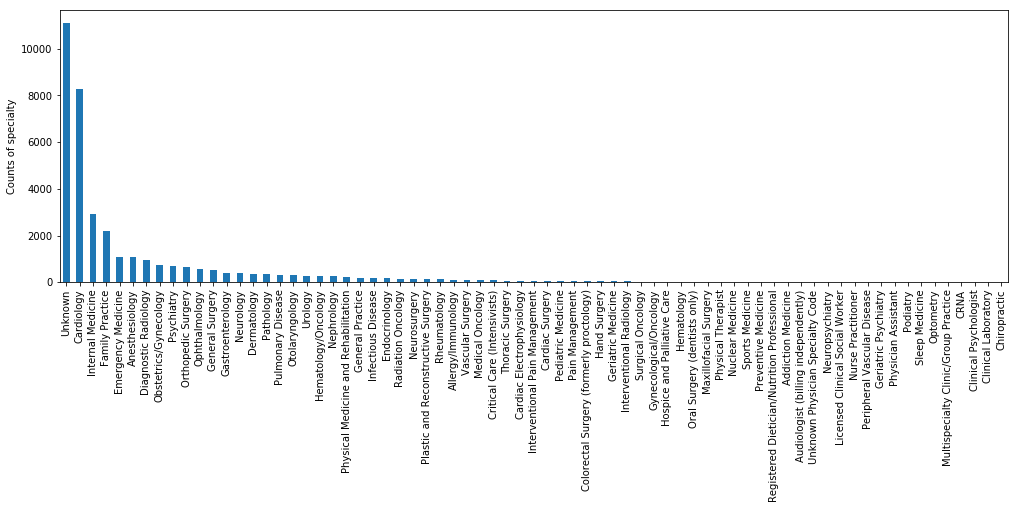

In [10]:
# Histogram for each specialty
plt.figure(figsize=(17, 5))
plt.ylabel("Counts of specialty")
phys['specialty'].value_counts().plot(kind='bar')

In [9]:
proc[proc['procedure_code'] == '99202']

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
431,27,99202,"new_patient_office_or_other_outpatient_visit,_...",18
650,43,99202,"new_patient_office_or_other_outpatient_visit,_...",36
786,54,99202,"new_patient_office_or_other_outpatient_visit,_...",169
1565,92,99202,"new_patient_office_or_other_outpatient_visit,_...",12
1686,99,99202,"new_patient_office_or_other_outpatient_visit,_...",39
2054,118,99202,"new_patient_office_or_other_outpatient_visit,_...",18
2123,122,99202,"new_patient_office_or_other_outpatient_visit,_...",47
3769,225,99202,"new_patient_office_or_other_outpatient_visit,_...",33
3841,229,99202,"new_patient_office_or_other_outpatient_visit,_...",22
